This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images from 233 patients with three kinds of brain tumor: meningioma (708 slices),glioma (1426 slices), and pituitary tumor (930 slices).These files were converted from the ".mat" file format to the ".png" format. The converted files are downloaded from kaggle https://www.kaggle.com/datasets/denizkavi1/brain-tumor?resource=download. The original dataset was shared by Jun Cheng, here. 
Cheng, Jun (2017): brain tumor dataset. figshare. Dataset. https://doi.org/10.6084/m9.figshare.1512427.v5

<span style="color:green">Christopher Nguyen code_v2</span>

## Importing Packages 

* First we import all the packages that will be used in the assignment.

* Since Keras is integrated in TensorFlow 2.x, we import `keras` from `tensorflow` and use `tenserflow.keras.xxx` to import all other Keras packages. The seed argument produces a deterministic sequence of tensors across multiple calls.

In [ ]:
#!pip install keras-tuner --upgrade

In [ ]:
#Ignore Warning
import warnings
warnings.filterwarnings("ignore") 
# set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import datetime
from packaging import version
from collections import Counter
import math
import numpy as np
import pandas as pd
import random

from timeit import default_timer as timer
import time
from datetime import timedelta
import os # Operation System
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from tqdm import tqdm
import cv2

In [ ]:
import tensorflow as tf
import keras_tuner as kt

import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential

#from tensorflow import keras
#from tensorflow.keras import models, layers
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Input
#from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [ ]:
from plot_keras_history import plot_history

In [ ]:
from sklearn.utils import shuffle

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True) 

## Verify TensorFlow version and Keras version

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2
print("Keras version: ", keras.__version__)

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.4.1
Keras version:  2.4.0


## Mount Google Drive to Colab environment

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#%cd /content/gdrive/My Drive/MSDS 462/Final Project - Brain Tumor Classification/
#!pwd
#!ls
print('Working Directory')
print(os.getcwd())

Working Directory
C:\Users\christophernguyen\Documents\msds\msds462_compvision\msds462_project


In [ ]:
work_dir = "/Users/christophernguyen/Documents/msds/msds462_compvision/msds462_project"

In [ ]:
print(work_dir)

/Users/christophernguyen/Documents/msds/msds462_compvision/msds462_project


In [ ]:
def show_random_examples(test_folder):
    plt.figure(figsize=(20,20))
    for i in range(3):
        file = random.choice(os.listdir(test_folder))
        image_path= os.path.join(test_folder, file)
        img=cv2.imread(image_path)
        ax=plt.subplot(3,3,i+1)
        ax.title.set_text(file)
        plt.imshow(img)

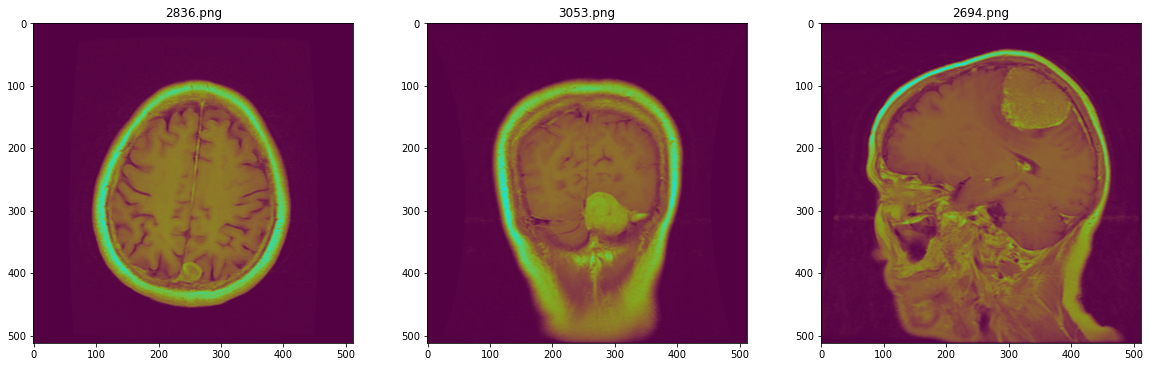

In [ ]:
#meningioma tumor MRI samples
show_random_examples(work_dir + '/Dataset/Brain-tumour-dataset-figshare/1')

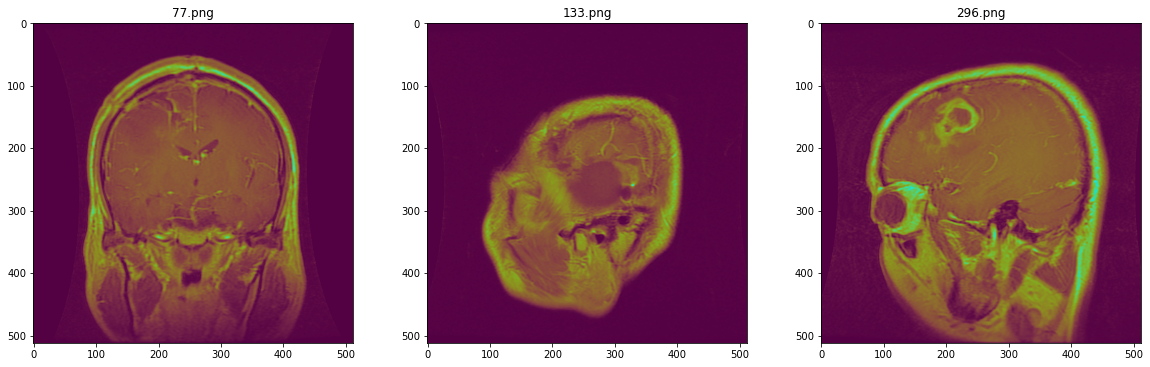

In [ ]:
#glioma tumor MRI samples
show_random_examples(work_dir + '/Dataset/Brain-tumour-dataset-figshare/2')

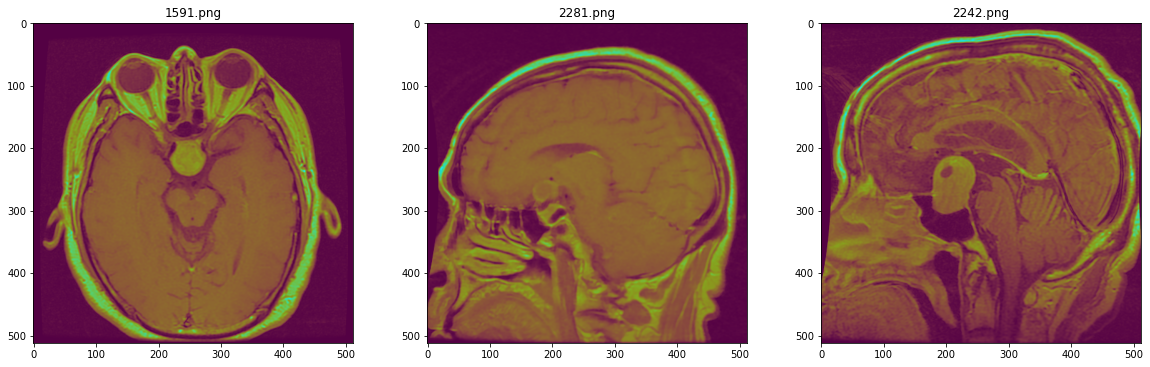

In [ ]:
#pituitary tumor MRI samples
show_random_examples(work_dir + '/Dataset/Brain-tumour-dataset-figshare/3')

In [ ]:
labels_dict ={1: 'meningioma_tumor', 2: 'glioma_tumor', 3: 'pituitary_tumor', 4: 'no_tumor'}

In [ ]:
labelskey = [1, 2, 3, 4]

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
#labels2 = ['meningioma_tumor', 'glioma_tumor', 'pituitary_tumor', 'no_tumor']

In [ ]:
print(labels)

['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']


In [ ]:
X = []
y = []
image_size = 150
for i in labels:
    folderPath = os.path.join(work_dir + '/Dataset/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)

        
for i in labels:
    folderPath = os.path.join(work_dir + '/Dataset/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)
        
X = np.array(X)
y = np.array(y)

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 152.21it/s]


In [ ]:
X.shape
y.shape

(3264, 150, 150, 3)

(3264,)

In [ ]:
X, y = shuffle(X,y, random_state=101)

In [ ]:
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))

In [ ]:
unique(y)

['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


In [ ]:
#print(y[1700:])

['glioma_tumor' 'glioma_tumor' 'glioma_tumor' ... 'pituitary_tumor'
 'pituitary_tumor' 'pituitary_tumor']


In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']

Text(0.4, 0.62, 'Brain Tumor MRI Image From Each Label')

Text(0.5, 1.0, 'meningioma_tumor')

(-0.5, 149.5, 149.5, -0.5)

Text(0.5, 1.0, 'glioma_tumor')

(-0.5, 149.5, 149.5, -0.5)

Text(0.5, 1.0, 'pituitary_tumor')

(-0.5, 149.5, 149.5, -0.5)

Text(0.5, 1.0, 'no_tumor')

(-0.5, 149.5, 149.5, -0.5)

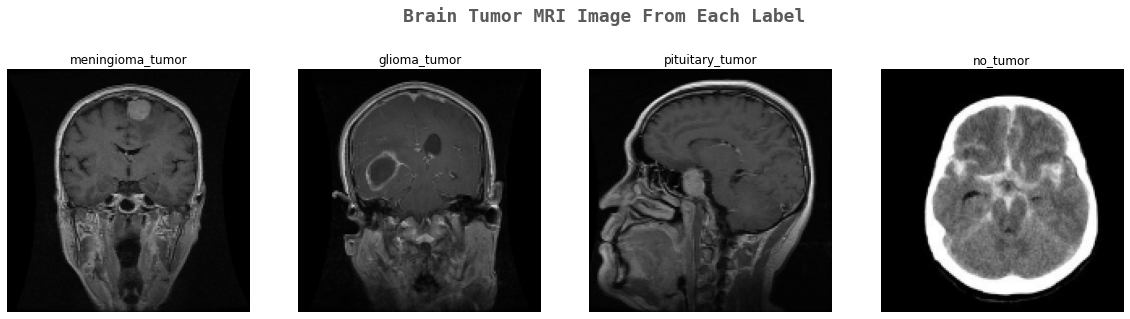

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Brain Tumor MRI Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labelskey:
  j=0
  while True :
    if y[j]==labels_dict[i]:
      ax[k].imshow(X[j])
      ax[k].set_title(y[j])
      ax[k].axis('off')
      k+=1
      break
    j+=1

([<matplotlib.patches.Wedge at 0x17761cb5040>,
 [Text(-0.5091752229191595, 0.9750592763341234, ''),
  Text(-1.0633360555826823, -0.2816317327608221, ''),
  Text(0.4750905473801114, -0.9921133865592513, ''),
  Text(0.8629302552419329, 0.6821666765447376, '')],
 [Text(-0.3934535813466233, 0.7534548953490953, '15.3%'),
  Text(-0.8216687702229817, -0.21762452076972613, '27.6%'),
  Text(0.3671154229755406, -0.7666330714321486, '28.4%'),
  Text(0.666809742686948, 0.5271287955118427, '28.7%')])

Text(0.5, 1.0, 'Image Label Distribution in Brain Tumor Train Set')

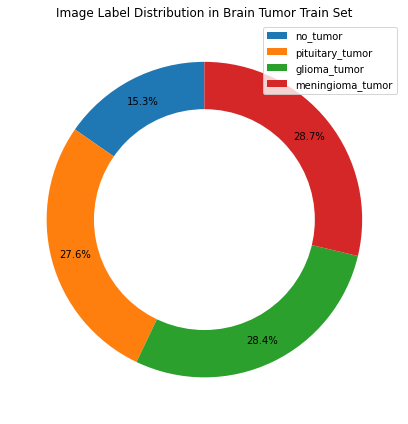

In [ ]:
df= pd.DataFrame(y, columns=['label'])

values = df['label'].value_counts().sort_values(ascending = True)

colors = sns.color_palette()

#create pie chart to see the distribution of label variable of interest
plt.pie(values, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.legend(values.index, loc="best")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(6,6)
# Equal aspect ratio ensures that pie is drawn as a circle 
plt.title("Image Label Distribution in Brain Tumor Train Set") 
plt.tight_layout()
plt.show()

## Train, Test and Validation split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
print('x_train:\t{}'.format(X_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(2611, 150, 150, 3)
y_train:	(2611,)
x_test:		(653, 150, 150, 3)
y_test:		(653,)


In [ ]:
X_train_norm = X_train.astype('float32')/255.
X_test_norm = X_test.astype('float32')/255.

In [ ]:
print(X_train_norm.shape)
print(X_test_norm.shape)

(2611, 150, 150, 3)
(653, 150, 150, 3)


In [ ]:
#X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train_norm
#                                                                              ,y_train
#                                                                              ,test_size=.2
#                                                                              ,random_state=42
#                                                                              ,shuffle=True)

In [ ]:
#print(X_train_split.shape, X_valid_split.shape, y_train_split.shape, y_valid_split.shape)

In [ ]:
print(labels)

['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
print(y_train)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
#print(y_train_split)

In [ ]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
print(y_test)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
#print(X_train_split.shape, X_valid_split.shape, X_test_norm.shape, y_train_split.shape, y_valid_split.shape)

In [ ]:
#print(y_train_split)

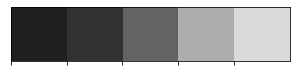

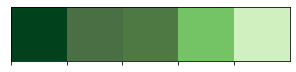

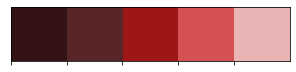

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

## Next steps:
1. Try Convolutional layers --> Christopher (Try Different weight regularization l1 & l2, Keras tuner to get best hyperparameters like nodes, learning rate, optimizer etc.
2. Image Data generator to generate batches of augmented data. --> Alex 
3. Transfer Learning --> Taylor (https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB7), Vgg16, resnet50
4. GAN Image generator --> Swati

Next - Model Deployment raspberry pi (Taylor)

In [ ]:
BATCH_SIZE = 256

In [ ]:
model3 = models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape = X_train_norm.shape[1:]),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(7, 7), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
#    tf.keras.layers.Dropout(0.1),
#model.add(layers.Dropout(0.3))
#    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding = 'same', activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(input_shape = X_train_norm.shape[1:]),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#    tf.keras.layers.Dropout(0.1),
#model.add(layers.Dropout(0.3))
#    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding = 'same', activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(input_shape = X_train_norm.shape[1:]),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#    tf.keras.layers.Dropout(0.1),
#model.add(layers.Dropout(0.3))
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
#    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=256, activation='relu'),
#    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 128)     18944     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 75, 75, 128)       512       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 256)       819456    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 256)       0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 37, 37, 256)      

In [ ]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_checkpoint = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 15)

In [ ]:
start = timer()
history3 = model3.fit(X_train_norm,
          y_train, 
          validation_split=0.4,
          batch_size=BATCH_SIZE,
          epochs=100,
          callbacks=[model_checkpoint])

dt = timer() - start
print ("Model trained in %f s" % dt)

Epoch 1/100
7/7 [==============================] - 9s 1s/step - loss: 653.8950 - accuracy: 0.2709 - val_loss: 25.8025 - val_accuracy: 0.2785
Epoch 2/100
7/7 [==============================] - 3s 380ms/step - loss: 216.8140 - accuracy: 0.2666 - val_loss: 91.2975 - val_accuracy: 0.1598
Epoch 3/100
7/7 [==============================] - 3s 381ms/step - loss: 73.1524 - accuracy: 0.3664 - val_loss: 31.9192 - val_accuracy: 0.2852
Epoch 4/100
7/7 [==============================] - 3s 379ms/step - loss: 26.6776 - accuracy: 0.4579 - val_loss: 14.0103 - val_accuracy: 0.2411
Epoch 5/100
7/7 [==============================] - 3s 380ms/step - loss: 19.2391 - accuracy: 0.4954 - val_loss: 8.7482 - val_accuracy: 0.1943
Epoch 6/100
7/7 [==============================] - 3s 393ms/step - loss: 17.3753 - accuracy: 0.4456 - val_loss: 16.6363 - val_accuracy: 0.3100
Epoch 7/100
7/7 [==============================] - 3s 379ms/step - loss: 9.3935 - accuracy: 0.6001 - val_loss: 9.1226 - val_accuracy: 0.3541
Epo

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

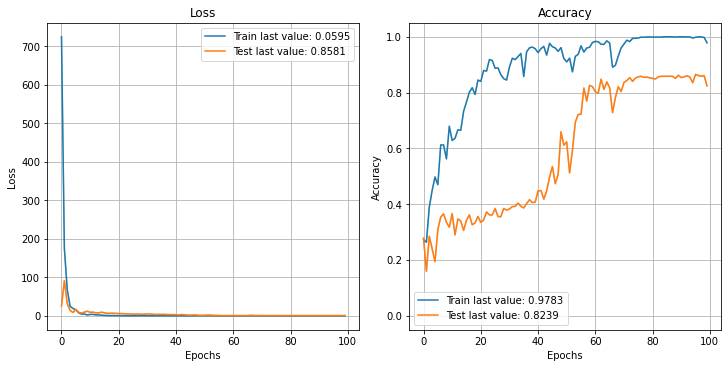

In [ ]:
plot_history(history3.history)

<Figure size 1440x1440 with 0 Axes>

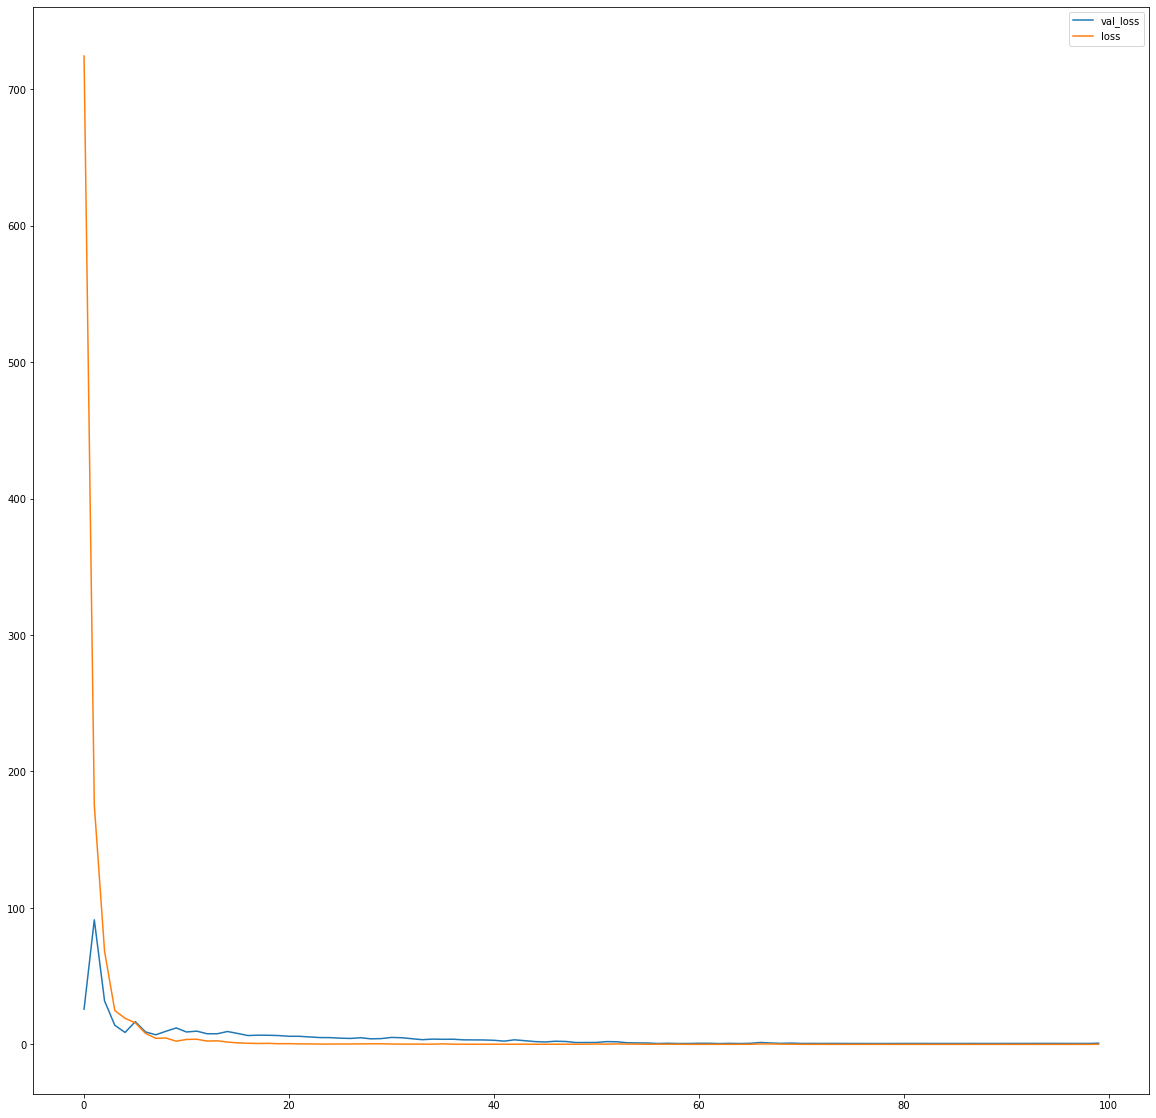

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(history3.history['val_loss'])
plt.plot(history3.history['loss'])
plt.legend(['val_loss','loss'])
plt.show()

In [ ]:
pred = model3.predict(X_test_norm)
pred = np.argmax(pred,axis=1)
y_test_pred = np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_pred,pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       187
           1       0.83      0.80      0.81       101
           2       0.78      0.76      0.77       179
           3       0.93      0.95      0.94       186

    accuracy                           0.85       653
   macro avg       0.84      0.84      0.84       653
weighted avg       0.84      0.85      0.84       653



<AxesSubplot:>

Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

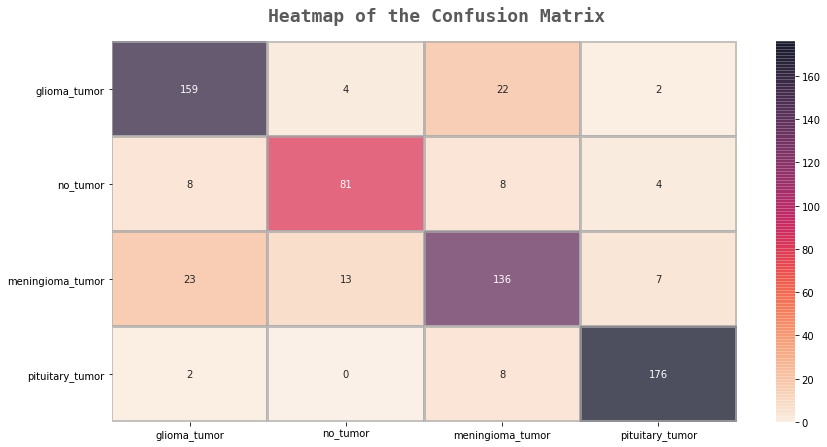

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_pred,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,fmt='g',
           cmap='rocket_r',alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
model4 = models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape = X_train_norm.shape[1:]),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(7, 7), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
#    tf.keras.layers.Dropout(0.1),
#model.add(layers.Dropout(0.3))
#    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding = 'same', activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(input_shape = X_train_norm.shape[1:]),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#    tf.keras.layers.Dropout(0.1),
#model.add(layers.Dropout(0.3))
#    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding = 'same', activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(input_shape = X_train_norm.shape[1:]),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#    tf.keras.layers.Dropout(0.1),
#model.add(layers.Dropout(0.3))
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
#    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
#    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

In [ ]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_18 (Batc (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 150, 150, 128)     18944     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 75, 75, 128)       512       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 256)       819456    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 37, 37, 256)       0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 37, 37, 256)      

In [ ]:
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_checkpoint_2 = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 15)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:
# Augmentation
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8],
                                   validation_split=0.4)  # brightness

In [ ]:
train_datagen.fit(X_train_norm)

In [ ]:
X_train_norm.shape

(2611, 150, 150, 3)

In [ ]:
len(X_train_norm)

2611

In [ ]:
#STEP_SIZE_TRAIN=train_datagen.n//train_datagen.batch_size

In [ ]:
#STEP_SIZE_VALID=train_datagen.n//validation_generator.batch_size

In [ ]:
steps = len(X_train_norm) * 0.6 // BATCH_SIZE

In [ ]:
steps = 90.0

In [ ]:
steps

6.0

In [ ]:
valsteps = len(X_train_norm) * 0.4 // BATCH_SIZE

In [ ]:
valsteps

2.0

In [ ]:
start = timer()
history4 = model4.fit(train_datagen.flow(X_train_norm,
                                         y_train,
                                         batch_size=BATCH_SIZE, 
                                         subset='training'),
                      validation_data=train_datagen.flow(X_train_norm,
                                         y_train,
                                         batch_size=BATCH_SIZE, 
                                         subset='validation'),
#                      validation_steps=valsteps,
                      steps_per_epoch= steps,
                                         epochs=100,
                                         callbacks=[model_checkpoint_2, reduce_lr])
dt = timer() - start
print ("Model trained in %f s" % dt)

Epoch 1/100
90/90 [==============================] - 11s 105ms/step - loss: 1.0931 - accuracy: 0.5214 - val_loss: 1.4312 - val_accuracy: 0.4377
Model trained in 11.688944 s


(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

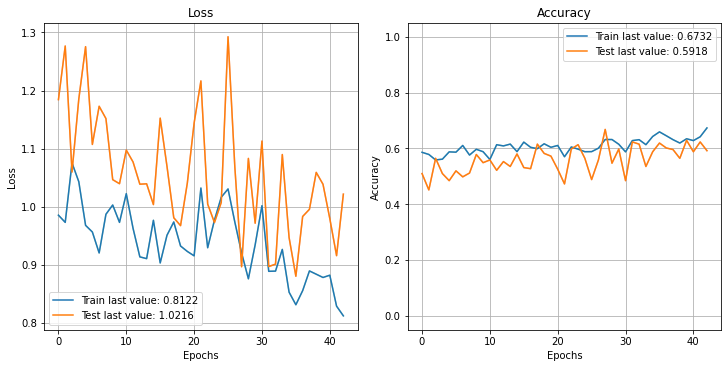

In [ ]:
plot_history(history4.history)

In [ ]:
pred = model4.predict(X_test_norm)
pred = np.argmax(pred,axis=1)
y_test_pred = np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_pred,pred))

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_pred,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,fmt='g',
           cmap='rocket_r',alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()